In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [25]:
News = pd.read_csv('News_proper', index_col = 0)

In [27]:
News = News.drop('Words', axis=1)

In [28]:
News.head()

,Article,ticker,time_tz,valid,start,end,CAR,hour,class,Negative,Neutral,Positive,Sentiment,Score
0,LOS ANGELES (Reuters) - Amazon.com Inc AMZN.O ...,AMZN,2019-11-06 11:43:00-05:00,True,2019-11-06 10:43:00-05:00,2019-11-06 12:43:00-05:00,-0.001852,10,NaN,0.010688,0.807917,0.077167,Neutral,0
1,NEW DELHI (Reuters) - India's antitrust body h...,AMZN,2019-11-01 10:03:00-04:00,True,2019-11-01 09:03:00-04:00,2019-11-01 11:03:00-04:00,-0.001099,9,NaN,0.020621,0.763345,0.078103,Neutral,0
2,WASHINGTON (Reuters) - If Amazon.com decides t...,AMZN,2019-10-28 15:34:00-04:00,True,2019-10-28 14:34:00-04:00,2019-10-28 16:34:00-04:00,0.000605,14,NaN,0.033970,0.769364,0.105727,Positive,1
3,(Reuters) - Amazon.com Inc's AMZN.O firm grip ...,AMZN,2019-10-28 12:31:00-04:00,True,2019-10-28 11:31:00-04:00,2019-10-28 13:31:00-04:00,0.001594,11,NaN,0.014182,0.798227,0.096682,Neutral,0
4,WASHINGTON (Reuters) - Microsoft Corp MSFT.O h...,AMZN,2019-10-27 12:02:00-04:00,True,2019-10-27 11:02:00-04:00,2019-10-27 13:02:00-04:00,0.000000,11,NaN,0.039538,0.693641,0.087333,Neutral,0


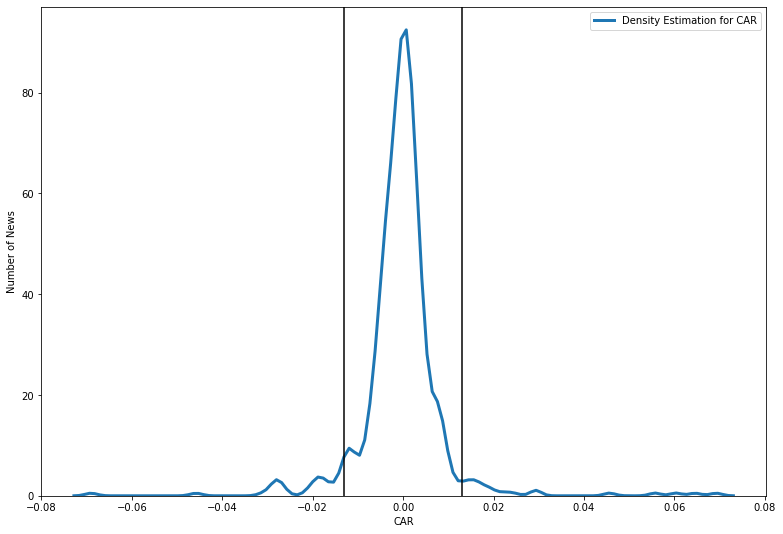

In [38]:
import seaborn as sns

fig, ax = plt.subplots(figsize= (13, 9))
sns.distplot(News['CAR'], ax=ax, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'Density Estimation for CAR')
plt.ylabel("Number of News")
plt.axvline(x=0.013, color = 'black')
plt.axvline(x=-0.013, color = 'black')

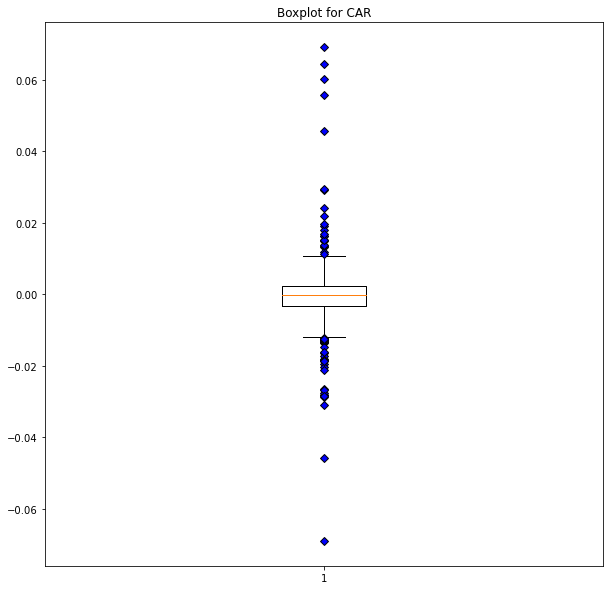

In [31]:
green_diamond = dict(markerfacecolor='b', marker='D')
fig3, ax3 = plt.subplots()
fig3.set_size_inches(10, 10)
ax3.set_title('Boxplot for CAR')
ax3.boxplot(News['CAR'], flierprops=green_diamond)
plt.show()

In [39]:
conditions = [(News['CAR'] <= -0.005), 
             (News['CAR'] > -0.005) & (News['CAR'] < 0.005),
             (News['CAR'] >= 0.005)]

values = [-1, 0, 1]

News['class'] = np.select(conditions, values)

In [45]:
News[['class', 'Score', 'Article']].groupby(['class', 'Score']).count()

Article
class Score         
-1    -1           5
       0          82
       1           8
 0    -1          14
       0         346
       1          54
 1    -1           3
       0          64
       1           6

In [46]:
News[['class', 'Score']].groupby('class').count()

,Score
class,
-1,95
0,416
1,73
